# 中心極限定理

データと計量経済学 4週目 別資料

小宮和真


---

## 中心極限定理

平均$\mu$、分散$\sigma^2$のあらゆる確率分布から抽出したサンプルサイズ$N$の標本について、$N$が大きくなるにつれ、その標本平均$\bar X$の分布は、平均$\mu$、分散$\sigma^2 / N$の正規分布に近づく。

$$
\bar X \sim N(\mu, \sigma^2 / N)
$$

和と見ても同じ。いろんなものを足した値は正規分布に近づく、ということが言える。

分かりやすい動画: [中心極限定理とは何か？ 【正規分布が現れるとき・確率】](https://www.youtube.com/watch?v=XXsTu66VB-E)

正規分布が世界のいろんなところで観測できるのはこの中心極限定理から納得できる。ある要素は他の様々な要素の結果として解釈できるように、ある確率変数は他の確率変数の和として解釈できる。

日常に現れる正規分布の例として身長が挙げられる。

<img src="https://statresearch.jp/BMI/images/distribution_17.svg" width="600">

引用: [統計情報リサーチ](https://statresearch.jp/BMI/), 男女の身長の分布

身長は遺伝的要素や栄養状態、環境要因など様々な要素が影響する。それらの要素の和として身長が決まると考えると、中心極限定理により、身長の分布が正規分布に従うことが納得できる。


---

## 



In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def dice_rolls(m):
    rolls = np.random.randint(1, 7, m)
    return rolls, rolls.sum()

In [4]:
dice_rolls(5)

(array([2, 3, 4, 3, 1]), 13)

In [5]:
def sums(m, n):
    sums = []
    for _ in range(n):
        _, sum = dice_rolls(m)
        sums.append(sum)
    return sums

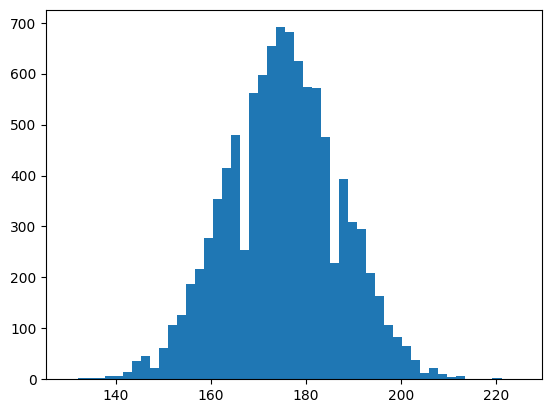

In [16]:
m, n = 50, 10000
dist = sums(m, n)
plt.hist(dist, bins=50);